In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control

In [3]:
data = np.loadtxt('ol_pulse_test_data.csv',delimiter=',')

In [4]:
n, dt, t, thd, enc, pwm = data.T

In [8]:
dt_vect = np.diff(t)

In [9]:
DT = dt_vect.mean()

In [10]:
DT

0.0040280561122244488

In [11]:
nvect = np.arange(len(t))
t_fake = nvect*DT

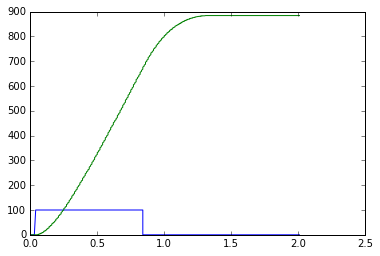

In [5]:
plt.plot(t,pwm,t,enc)

In [7]:
def myTF(c):
    A = c[0]
    p = c[1]
    G = control.TransferFunction(A,[1,p,0])
    return G

In [12]:
def mymodel(c):
    G = myTF(c)
    t_out, y_model, x_model = control.forced_response(G,t_fake,pwm)
    return y_model

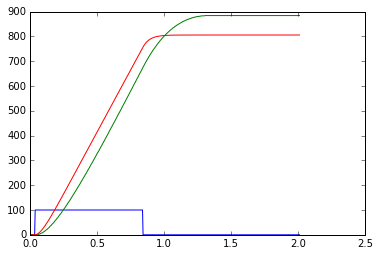

In [18]:
ig = [200,20]
y_ig = mymodel(ig)
plt.plot(t_fake,pwm,t_fake,enc,t_fake,y_ig)

In [19]:
def mycost(c):
    y_model = mymodel(c)
    evect = enc - y_model
    cost = (evect**2).sum()
    return cost

In [20]:
ig_cost = mycost(ig)

In [21]:
ig_cost

2528856.931747078

In [22]:
from scipy import optimize

In [23]:
c_opt = optimize.fmin(mycost,ig)

Optimization terminated successfully.
         Current function value: 20921.434132
         Iterations: 58
         Function evaluations: 111


In [24]:
c_opt

array([ 58.80513918,   5.32248358])

In [25]:
y_opt = mymodel(c_opt)

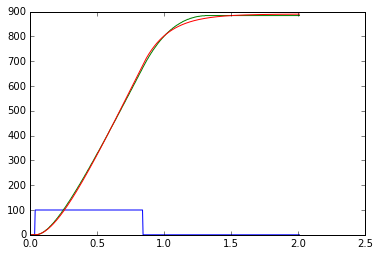

In [26]:
plt.plot(t_fake,pwm,t_fake,enc,t_fake,y_opt)

In [27]:
myTF(c_opt)


    58.81
-------------
s^2 + 5.322 s